In [17]:
import os
import glob
import scipy.io as sio

In [18]:
IMAGE_PATH = "images/*"
ANNOTATION_PATH = "annotations-mat"
OUTPUT_PATH = "resized_images"

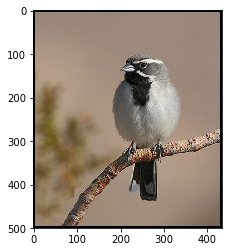

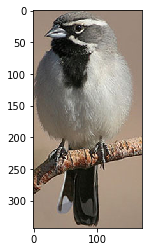

In [19]:
import matplotlib.pyplot as plt

for x in glob.glob('images/*/*.jpg'):
    img_name = os.path.basename(x)
    mat_name = img_name.replace(".jpg", ".mat")
    dir_name = os.path.basename(os.path.dirname(x))
    mat_path = os.path.join(ANNOTATION_PATH, dir_name, mat_name)
    
    mat = sio.loadmat(mat_path)
    
    left, top, right, bottom = [mat['bbox'][0][0][i][0][0] for i in range(4)]
    
    image = plt.imread(x)
    plt.imshow(image)
    plt.show()
    plt.imshow(image[top:bottom, left:right])
    plt.show()
    
    break

In [16]:
left, top, right, bottom

(95, 70, 449, 314)